In [0]:
# Setup
import requests as r
import pandas as pd
from itertools import product
import numpy as np

![picture](https://drive.google.com/uc?id=1XOBmVqKxA7QA1YPMWBcLvI3ZQDDLSp02)

In [0]:
# Credentials
url = 'https://api.yelp.com/v3/businesses/search'
key = '2DAEENERct1-cdmOJYoa-fud1SwrYN75TStPGc5pY3PL2w6iAqARMQlzxJXP1VzKbL-2wQJ_cOalA8ZCEK2pbTgfdibrB7KJ8DYVhsH0Ekg3YPeXaYjvFbWkYFeFXXYx'
headers = {
    'Authorization': 'Bearer %s' % key
}


In [0]:
# Test Scrape
test_parameters = {
    'location': '3215 Eagle Street, Los Angeles CA 90063',
    'term': 'free wifi',
    'radius': 805,
    'limit': 3
}

response = r.get(url, headers=headers, params=test_parameters)
data = response.json()
data

{'businesses': [{'alias': 'mary-alicias-mexican-restaurant-los-angeles',
   'categories': [{'alias': 'mexican', 'title': 'Mexican'},
    {'alias': 'cafes', 'title': 'Cafes'},
    {'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}],
   'coordinates': {'latitude': 34.035579, 'longitude': -118.201225},
   'display_phone': '(323) 269-0339',
   'distance': 137.65325027352577,
   'id': 'nVV9OAXpBK2KCHGP-k5zHA',
   'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/gHany9H3hhUywAo1DCi9NQ/o.jpg',
   'is_closed': False,
   'location': {'address1': '3100 E 4th St',
    'address2': '',
    'address3': '',
    'city': 'Los Angeles',
    'country': 'US',
    'display_address': ['3100 E 4th St', 'Los Angeles, CA 90063'],
    'state': 'CA',
    'zip_code': '90063'},
   'name': "Mary Alicia's Mexican Restaurant",
   'phone': '+13232690339',
   'price': '$',
   'rating': 4.0,
   'review_count': 72,
   'transactions': [],
   'url': 'https://www.yelp.com/biz/mary-alicias-mexican-restaurant-l

In [0]:
# Scaled Scrape
# Create Tuples
addresses = ['3051 E 5th St Los Angeles, CA 90063', '1200 W 7th Street Los Angeles CA 90017']
steps = np.arange(0,500,50)
tuples = list(product(addresses, steps))

# Empty list for list of lists, column names
listings = []
cols = ['Name', 'Address', 'Yelp Page', 'Phone', 'Reviews', 'Rating']

# Loop through search parameters
for address, step in tuples:
  params = {
      'location': address,
      'term': 'free wifi',
      'offset': step,
      'limit': 50,
      'radius': 1000}
  response = r.get(url, headers=headers, params=params)
  raw_data = response.json()    
  for business in raw_data['businesses']:
    name = business['name']
    address = business['location']['display_address'][0]
    yelp_page = business['url']
    phone = business['phone']
    reviews = business['review_count']
    rating = business['rating']
  listings.append([name, address, yelp_page, phone, reviews, rating])
  df = pd.DataFrame.from_records(listings, index='Name', columns=cols)
print(f'Number of Listings Scraped: {len(df)}')
df.head()   

Number of Listings Scraped: 20


,Address,Yelp Page,Phone,Reviews,Rating
Name,,,,,
McDonald's,3458 Whittier Blvd,https://www.yelp.com/biz/mcdonalds-los-angeles...,+13232632559,56,1.5
McDonald's,"3051 E 5th St Los Angeles, CA 90063",https://www.yelp.com/biz/mcdonalds-los-angeles...,+13232632559,56,1.5
McDonald's,"3051 E 5th St Los Angeles, CA 90063",https://www.yelp.com/biz/mcdonalds-los-angeles...,+13232632559,56,1.5
McDonald's,"3051 E 5th St Los Angeles, CA 90063",https://www.yelp.com/biz/mcdonalds-los-angeles...,+13232632559,56,1.5
McDonald's,"3051 E 5th St Los Angeles, CA 90063",https://www.yelp.com/biz/mcdonalds-los-angeles...,+13232632559,56,1.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff56d142160>,
      dtype=object)

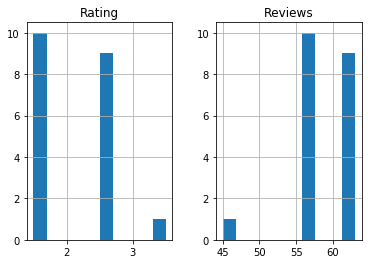

In [0]:
df.hist()